# Stop Regions Group Summary

In [44]:
import os
os.chdir("/home/tales/dev/master/mdc_analysis/")
print("working dir", os.getcwd())

import src.ml.markov as mk
from src.dao import csv_dao
from src.entity.stop_region import StopRegionGroup, sr_row_to_stop_region
from src.utils.time_utils import human_time, diff_between_dates

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

working dir /home/tales/dev/master/mdc_analysis


## Loading Data

In [2]:
user_stop_region_group = {}

for user_id in os.listdir("outputs/stop_regions/"):
    print("Loading user {} data".format(user_id))
    user_stop_region_group[user_id] = csv_dao.stop_region_sequence(user_id)

Loading user 6189 data
Loading user 5936 data
Loading user 6087 data
Loading user 5973 data
Loading user 6085 data
Loading user 6074 data
Loading user 6012 data
Loading user 5982 data
Loading user 5948 data
Loading user 5974 data
Loading user 6090 data
Loading user 6199 data
Loading user 6068 data
Loading user 6024 data
Loading user 5976 data
Loading user 6094 data
Loading user 5941 data
Loading user 5995 data
Loading user 5962 data
Loading user 6093 data
Loading user 6033 data
Loading user 6079 data
Loading user 6038 data
Loading user 6175 data
Loading user 6042 data
Loading user 5924 data
Loading user 6083 data
Loading user 6178 data
Loading user 5958 data
Loading user 6086 data
Loading user 6100 data
Loading user 5945 data
Loading user 5925 data
Loading user 5935 data
Loading user 6172 data
Loading user 5955 data
Loading user 6073 data
Loading user 5980 data
Loading user 6010 data
Loading user 5993 data
Loading user 6037 data
Loading user 5979 data
Loading user 5966 data
Loading use

### Group Lengths

In [5]:
group_lengths = []

for user_id in user_stop_region_group.keys():
    group_lengths.append({"user_id": user_id, "len": len(user_stop_region_group[user_id])})
    
group_lengths = pd.DataFrame(group_lengths)

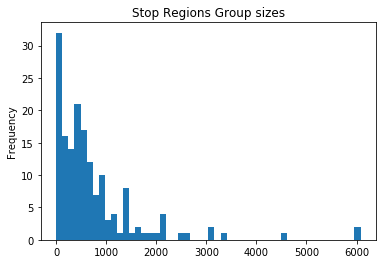

In [10]:
group_lengths["len"].plot.hist(title="Stop Regions Group sizes", bins=50)

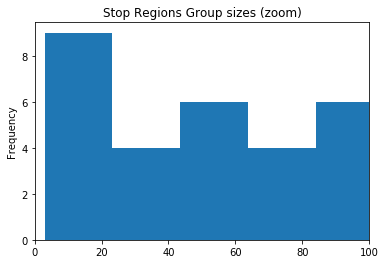

In [16]:
group_lengths["len"].plot.hist(title="Stop Regions Group sizes (zoom)", bins=300, xlim=(0, 100))

### Group Time Window

In [51]:
group_time_window = []

for user_id in user_stop_region_group.keys():
    sr_sequence = user_stop_region_group[user_id]
    max_time = sr_sequence[-1].end_time
    min_time = sr_sequence[0].start_time
    group_time_window.append({"user_id": user_id, "min_time": min_time, "max_time": max_time})

group_time_window = pd.DataFrame(group_time_window)
group_time_window["max_time_h"] = group_time_window["max_time"].apply(lambda value : human_time(value)["datetime"])
group_time_window["min_time_h"] = group_time_window["min_time"].apply(lambda value : human_time(value)["datetime"])
group_time_window["delta_t"] = group_time_window["max_time"] - group_time_window["min_time"]
group_time_window["delta_days"] = group_time_window.apply(lambda row : diff_between_dates(row["min_time"], row["max_time"]), axis=1)

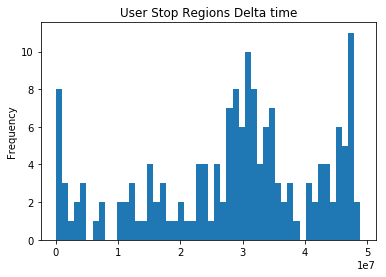

In [52]:
group_time_window["delta_t"].plot.hist(title="User Stop Regions Delta time", bins=50)

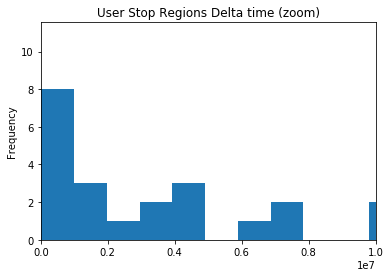

In [53]:
group_time_window["delta_t"].plot.hist(title="User Stop Regions Delta time (zoom)", bins=50, xlim=(0, 10000000))

In [54]:
group_time_window.sort_values(by="delta_t")

,max_time,min_time,user_id,max_time_h,min_time_h,delta_t,delta_days
135,1271185428.000,1271171171.000,6190,2010-04-13 19:03:48,2010-04-13 15:06:11,14257.000,0.165
53,1270753574.000,1270652715.000,6183,2010-04-08 19:06:14,2010-04-07 15:05:15,100859.000,1.167
74,1271327369.000,1271179548.000,6182,2010-04-15 10:29:29,2010-04-13 17:25:48,147821.000,1.711
46,1271490711.000,1271302425.000,6169,2010-04-17 07:51:51,2010-04-15 03:33:45,188286.000,2.179
97,1270983289.000,1270649377.000,6166,2010-04-11 10:54:49,2010-04-07 14:09:37,333912.000,3.865
110,1254902751.000,1254468326.000,5952,2009-10-07 08:05:51,2009-10-02 07:25:26,434425.000,5.028
154,1255082504.000,1254303401.000,5951,2009-10-09 10:01:44,2009-09-30 09:36:41,779103.000,9.017
30,1268425657.000,1267515213.000,6100,2010-03-12 20:27:37,2010-03-02 07:33:33,910444.000,10.538
160,1271784094.000,1270654245.000,6181,2010-04-20 17:21:34,2010-04-07 15:30:45,1129849.000,13.077
78,1270478755.000,1269015989.000,6103,2010-04-05 14:45:55,2010-03-19 16:26:29,1462766.000,16.930
